# Esercizio 1
Fare la somma vettoriale di due elettroni di carica opposta e disegnarne la massa, poi fare lo stesso coi muoni. Dunque fare un fit del fondo (dove il fondo è considerabile come gli eventi con muoni di stessa carica)

## Electrons

In [29]:
import ROOT

In [43]:
file = ROOT.TFile("Data.root","OPEN")
mytree = file.trees.events
#mytree.Print("electron*")

Percentuale di completamento: 
0.0
Percentuale di completamento: 
20.0
Percentuale di completamento: 
40.0
Percentuale di completamento: 
60.0
Percentuale di completamento: 
80.0
Percentuale di completamento: 
100.0
Percentuale di completamento: 
120.0
Percentuale di completamento: 
140.0
Percentuale di completamento: 
160.0
Percentuale di completamento: 
180.0
Percentuale di completamento: 
200.0
Percentuale di completamento: 
220.00000000000003
Percentuale di completamento: 
240.0
Percentuale di completamento: 
260.0
Percentuale di completamento: 
280.0
Percentuale di completamento: 
300.0
Percentuale di completamento: 
320.0
Percentuale di completamento: 
340.0
Percentuale di completamento: 
360.0
Percentuale di completamento: 
380.0
Percentuale di completamento: 
400.0
Percentuale di completamento: 
420.0
Percentuale di completamento: 
440.00000000000006
Percentuale di completamento: 
459.99999999999994
Percentuale di completamento: 
480.0
Percentuale di completamento: 
500.0
Perce

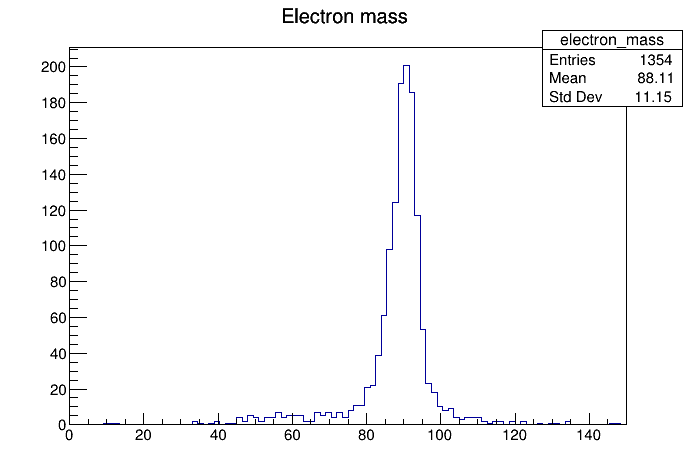

In [44]:
h_e_mass = ROOT.TH1F("electron_mass","Electron mass",100,0,150) 

for i in range(mytree.GetEntries()):
    mytree.GetEntry(i)
    if(i%2000==0):
        
        print("Percentuale di completamento: ")
        print( i/(10000)*100)
    for ei in range(mytree.electrons_size):
        for ej in range(ei):
            if(mytree.electrons_charge[ei]*mytree.electrons_charge[ej]<0):

                electron_0 = ROOT.TLorentzVector()
                electron_1 = ROOT.TLorentzVector()
                electron_sum = ROOT.TLorentzVector()
                electron_0.SetPtEtaPhiE(mytree.electrons_pt[ei],mytree.electrons_eta[ei],mytree.electrons_phi[ei],mytree.electrons_e[ei])
                electron_1.SetPtEtaPhiE(mytree.electrons_pt[ej],mytree.electrons_eta[ej],mytree.electrons_phi[ej],mytree.electrons_e[ej])
                electron_sum = electron_0+electron_1
                h_e_mass.Fill(electron_sum.M())
c1=ROOT.TCanvas()
c1.Draw()
h_e_mass.Draw()

## Muons_1
Prima il metodo 1, dove non ho ancora letto la soluzione di Iorio

Percentuale di completamento: 
0.0
Percentuale di completamento: 
20.0
Percentuale di completamento: 
40.0
Percentuale di completamento: 
60.0
Percentuale di completamento: 
80.0
Percentuale di completamento: 
100.0
Percentuale di completamento: 
120.0
Percentuale di completamento: 
140.0
Percentuale di completamento: 
160.0
Percentuale di completamento: 
180.0
Percentuale di completamento: 
200.0
Percentuale di completamento: 
220.00000000000003
Percentuale di completamento: 
240.0
Percentuale di completamento: 
260.0
Percentuale di completamento: 
280.0
Percentuale di completamento: 
300.0
Percentuale di completamento: 
320.0
Percentuale di completamento: 
340.0
Percentuale di completamento: 
360.0
Percentuale di completamento: 
380.0
Percentuale di completamento: 
400.0
Percentuale di completamento: 
420.0
Percentuale di completamento: 
440.00000000000006
Percentuale di completamento: 
459.99999999999994
Percentuale di completamento: 
480.0
Percentuale di completamento: 
500.0
Perce

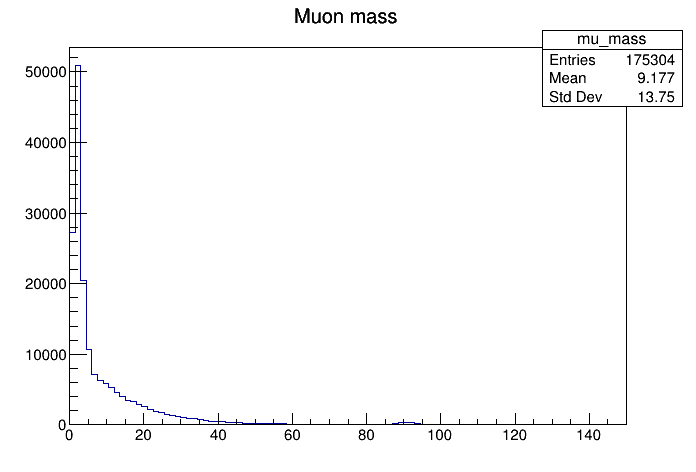

In [45]:
h_mu_mass = ROOT.TH1F("mu_mass","Muon mass",100,0,150)

for i in range(mytree.GetEntries()):
    mytree.GetEntry(i)
    if(i%2000==0):
        
        print("Percentuale di completamento: ")
        print( i/(10000)*100)
    for ei in range(mytree.muontracks_size):
        for ej in range(ei):
            if(mytree.muontracks_charge[ei]*mytree.muontracks_charge[ej] < 0):

                muons_0 = ROOT.TLorentzVector()
                muons_1 = ROOT.TLorentzVector()
                muons_sum = ROOT.TLorentzVector()
                
                muons_0.SetPtEtaPhiE(mytree.muontracks_pt[ei],mytree.muontracks_eta[ei],mytree.muontracks_phi[ei],mytree.muontracks_e[ei])
                muons_1.SetPtEtaPhiE(mytree.muontracks_pt[ej],mytree.muontracks_eta[ej],mytree.muontracks_phi[ej],mytree.muontracks_e[ej])
                
                muons_sum = muons_0+muons_1
                
                h_mu_mass.Fill(muons_sum.M())
c2=ROOT.TCanvas()
c2.Draw()
h_mu_mass.Draw()

## Muons_2

In [46]:
class particle:
    def __init__(self, pt,eta,phi,e,charge,flavor):
        self.pt=pt
        self.eta=eta
        self.phi=phi
        self.e=e
        self.charge=charge
        self.flavor=flavor
        self.p4 = ROOT.TLorentzVector()
        self.p4.SetPtEtaPhiE(pt,eta,phi,e)
        
#2 Metodo per estrarla:    
def get_particle(tree=mytree,var="muontracks",index=0):
    flav_dict={"muontracks":13,"electrons":11}
    p = particle(getattr(tree,var+"_pt")[index],#getattr chiama dall'esterno un attributo con il nome preso come stringa
                getattr(tree,var+"_eta")[index],
                getattr(tree,var+"_phi")[index],
                getattr(tree,var+"_e")[index],
                getattr(tree,var+"_charge")[index] if hasattr(tree,var+"_charge") else 0,#nota: questo per i jet fallirà se non faccio qualcosa!
                -1*getattr(tree,var+"_charge")[index]*(flav_dict[var]) if hasattr(tree,var+"_charge") else 0)
    return p

def get_collection(tree=mytree,var="muontracks"):
    particles=[get_particle(tree,var,i) for i in range(getattr(tree,var+"_size"))]
    return particles

Warning in <TFile::Append>: Replacing existing TH1: mu_mass (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: mu_mass (Potential memory leak).


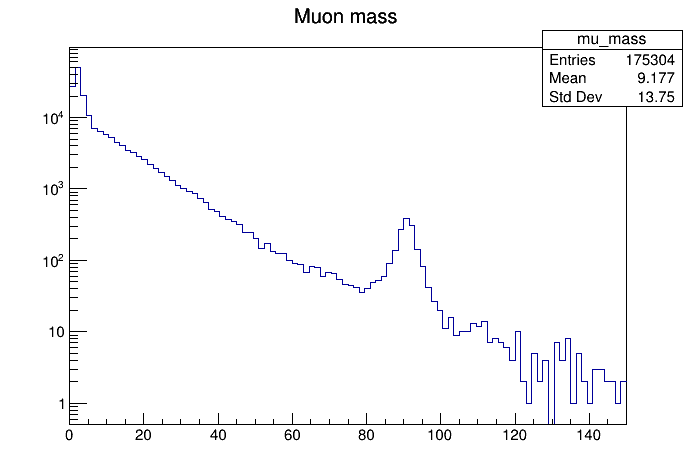

In [47]:
are_os = lambda x,y: x.charge*y.charge<0 #Uso lambda per vedere se sono segno opposto (opposite sign)
are_ss = lambda x,y: x.charge*y.charge>0

h_mu_mass_os = ROOT.TH1F("mu_mass","Muon mass",100,0,150)
h_mu_mass_ss = ROOT.TH1F("mu_mass","Muon mass",100,0,150)

c2 = ROOT.TCanvas()

for i in range(mytree.GetEntries()):
    mytree.GetEntry(i)
    muons=get_collection(mytree,"muontracks")
    
    for mi in range(len(muons)):
        for mj in range(mi):
            if(are_os(muons[mi],muons[mj])):
                h_mu_mass_os.Fill((muons[mi].p4+muons[mj].p4).M())
            else:
                h_mu_mass_ss.Fill((muons[mi].p4+muons[mj].p4).M())
c2.Draw()
c2.SetLogy()
h_mu_mass_os.Draw()

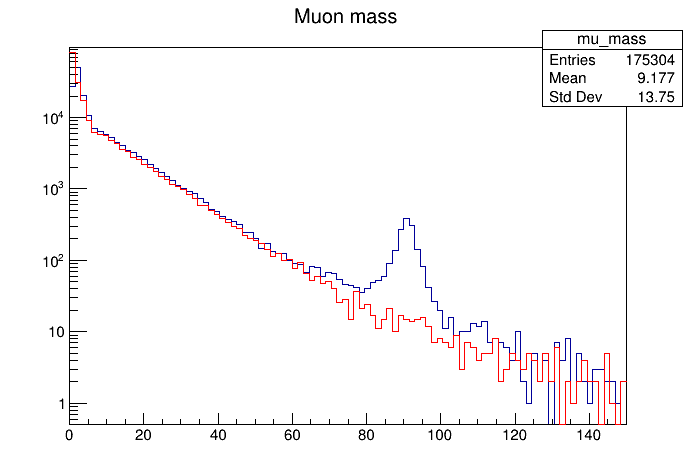

In [48]:
c2.Draw()
h_mu_mass_ss.SetLineColor(ROOT.kRed)
h_mu_mass_ss.Draw("same")